<h1>Digit Recognizer</h1>

[https://www.kaggle.com/c/digit-recognizer](https://www.kaggle.com/c/digit-recognizer)

Author: Vaasudevan Srinivasan [(Portfolio)](https://vaasudevans.github.io) <br>
Created on: July 09, 2021 <br>

This notebook demonstrates how to use augmentation as a neural network layer. <br>
This will perform augmentation in GPU (if available) and it will speed up training a lot faster.

In [1]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme()

# Data Preparation

In [2]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


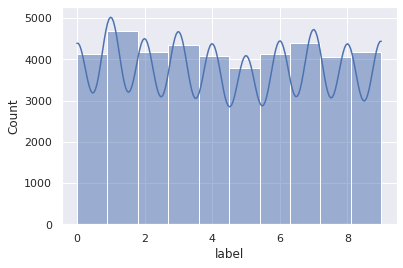

In [3]:
sns.histplot(train_df, x='label', bins=10, kde=True);

In [4]:
x_train = train_df.drop('label', axis=1).to_numpy()
y_train = train_df['label'].to_numpy()

x_train = x_train.reshape((len(train_df), 28, 28))
x_train = np.expand_dims(x_train, axis=-1)

print(x_train.shape, y_train.shape)

(42000, 28, 28, 1) (42000,)


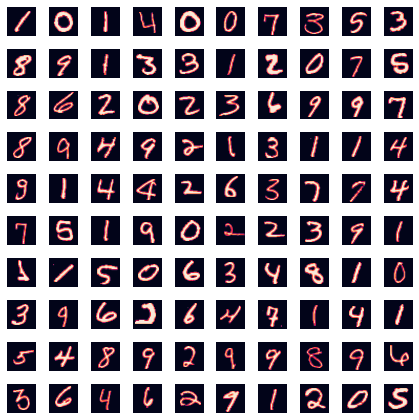

In [5]:
# Visualization
plt.figure(figsize=(6, 6))
cols, rows = 10, 10
for i in range(cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.tight_layout();

# CNN model

In [6]:
# Augmentation Layer
data_augmentation = tf.keras.models.Sequential([
    preprocessing.RandomRotation(0.1),
    preprocessing.RandomZoom(0.1),
], name='augmentation')

# CNN Model
cnn_model = tf.keras.models.Sequential([
    Conv2D(filters=24, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=36, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
], name='cnn_model')

In [7]:
# To maintain same training loss and accuracy
tf.random.set_seed(1996)

# Construct the model with Augmentation
inputs = Input(shape=(28, 28, 1), name='input')
x = data_augmentation(inputs)
x = cnn_model(inputs)
x = Dense(128, activation='relu', name='hidden')(x)
outputs = Dense(10, activation='softmax', name='output')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
cnn_model (Sequential)       (None, 900)               8052      
_________________________________________________________________
hidden (Dense)               (None, 128)               115328    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 124,670
Trainable params: 124,670
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

h = model.fit(x_train, y_train,
              validation_split=0.05,
              epochs=10)

Epoch 1/10
1247/1247 [==============================] - 6s 3ms/step - loss: 1.1769 - accuracy: 0.8661 - val_loss: 0.0910 - val_accuracy: 0.9719
Epoch 2/10
1247/1247 [==============================] - 3s 3ms/step - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.1140 - val_accuracy: 0.9671
Epoch 3/10
1247/1247 [==============================] - 3s 3ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0761 - val_accuracy: 0.9738
Epoch 4/10
1247/1247 [==============================] - 3s 3ms/step - loss: 0.0376 - accuracy: 0.9874 - val_loss: 0.0658 - val_accuracy: 0.9781
Epoch 5/10
1247/1247 [==============================] - 3s 3ms/step - loss: 0.0352 - accuracy: 0.9882 - val_loss: 0.0722 - val_accuracy: 0.9800
Epoch 6/10
1247/1247 [==============================] - 3s 3ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0648 - val_accuracy: 0.9814
Epoch 7/10
1247/1247 [==============================] - 3s 3ms/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0702 - val_accuracy:

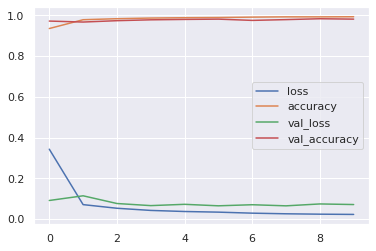

In [9]:
pd.DataFrame(h.history).plot();

# Prediction and Submission

In [10]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_test = test_df.to_numpy().reshape((len(test_df), 28, 28))
x_test = np.expand_dims(x_test, axis=-1)
print(x_test.shape)

submission = pd.DataFrame({
    "ImageId": test_df.index + 1,
    "Label": np.argmax(model.predict(x_test), axis=1)
})

submission.head()

(28000, 28, 28, 1)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [12]:
submission.to_csv('submission.csv', index=False)